# Enhancing Alzheimer's Disease Diagnosis with Machine Learning: A Study Using the OASIS Dataset

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   

## DATA MANIPULATION AND DATA CLEANING

In [165]:
df=pd.read_csv(r'C:\Users\USER\Downloads\dementia_dataset (1).csv')
df.rename ( columns = { 'Group': 'Dementia'}, inplace=True ) # rename
df.rename ( columns = { 'M/F': 'Sex'}, inplace=True ) # rename
df.drop(columns=['Subject ID', 'MRI ID'], inplace=True) # drop
df.head()

,Dementia,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


CONTENTS OF THE DATASET:

This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit

Visit: Number of visits during study,MR delay: Delay, M/F: Sex (F=Female, M=Male), Age :Age in (years), EDUC :Education in (years), SES :Social and economic status, MMSE: Examination of mini-mental state, CDR :Clinical dementia rating, eTIV: Estimated total incremental value, nWBV: Normalize total brain volume, ASF: Atlas scaling facto

In [166]:
df.shape

(373, 13)

In [167]:
# rename columns
col = df.columns
new_col = []
for columns in col:
  columns_low = columns.title()
  new_col.append (columns_low)
df.columns = new_col

In [168]:
df.describe()

,Visit,Mr Delay,Age,Educ,Ses,Mmse,Cdr,Etiv,Nwbv,Asf
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [169]:
print ( "Let's see the values ​​of the `Hand` column:", df.Hand.unique(), '\n' )
print ( 'Unique value in this column is R. We can drop it.' )
df.drop(columns=['Hand'], inplace=True)

Let's see the values ​​of the `Hand` column: ['R'] 

Unique value in this column is R. We can drop it.


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  373 non-null    object 
 1   Visit     373 non-null    int64  
 2   Mr Delay  373 non-null    int64  
 3   Sex       373 non-null    object 
 4   Age       373 non-null    int64  
 5   Educ      373 non-null    int64  
 6   Ses       354 non-null    float64
 7   Mmse      371 non-null    float64
 8   Cdr       373 non-null    float64
 9   Etiv      373 non-null    int64  
 10  Nwbv      373 non-null    float64
 11  Asf       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


In [171]:
 df.isna().sum()

Dementia     0
Visit        0
Mr Delay     0
Sex          0
Age          0
Educ         0
Ses         19
Mmse         2
Cdr          0
Etiv         0
Nwbv         0
Asf          0
dtype: int64

In [172]:


df.Ses.fillna ( df.Ses.mode() [0], inplace=True ) # impute mode
df.Mmse.fillna ( df.Mmse.mean() , inplace=True ) # impute mean
df.isna().sum()

Dementia    0
Visit       0
Mr Delay    0
Sex         0
Age         0
Educ        0
Ses         0
Mmse        0
Cdr         0
Etiv        0
Nwbv        0
Asf         0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  373 non-null    object 
 1   Visit     373 non-null    int64  
 2   Mr Delay  373 non-null    int64  
 3   Sex       373 non-null    object 
 4   Age       373 non-null    int64  
 5   Educ      373 non-null    int64  
 6   Ses       373 non-null    float64
 7   Mmse      373 non-null    float64
 8   Cdr       373 non-null    float64
 9   Etiv      373 non-null    int64  
 10  Nwbv      373 non-null    float64
 11  Asf       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


## 2. EXPLORATORY DATA ANALYSIS
Analysis of the target variable

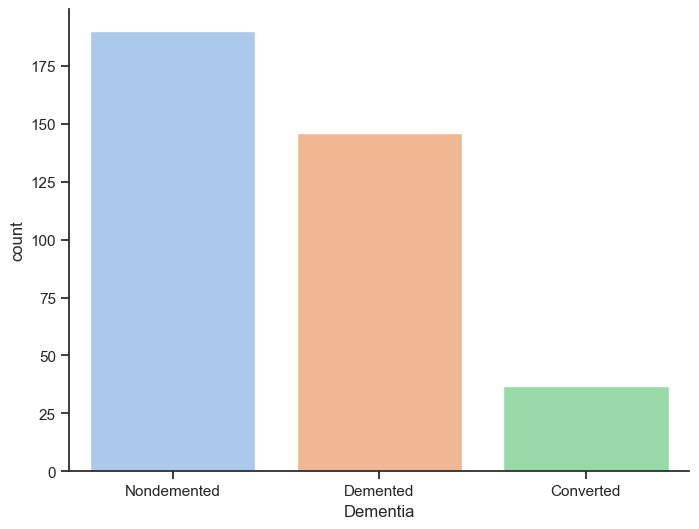

In [174]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='pastel')
fig = plt.figure ( figsize= (8,6) )
ax=sns.countplot(data=df, x='Dementia')

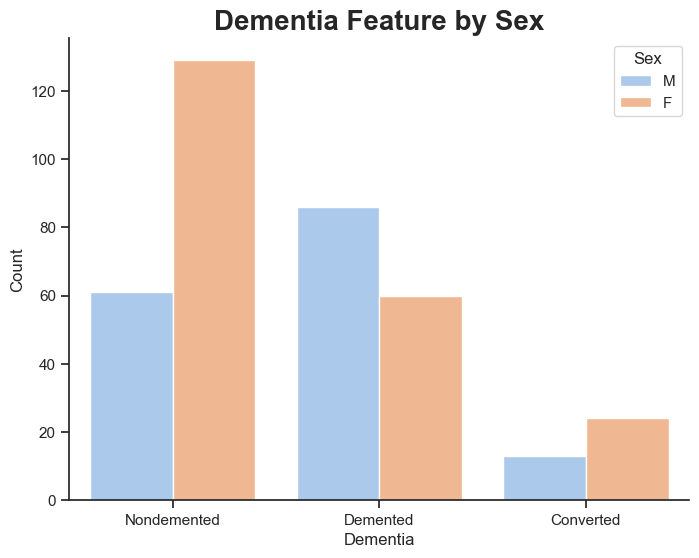

In [175]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dementia', data=df, hue='Sex')  # Change df.Dementia to x='Dementia'
plt.title("Dementia Feature by Sex", size=20, weight='bold')
plt.ylabel('Count')
plt.show()


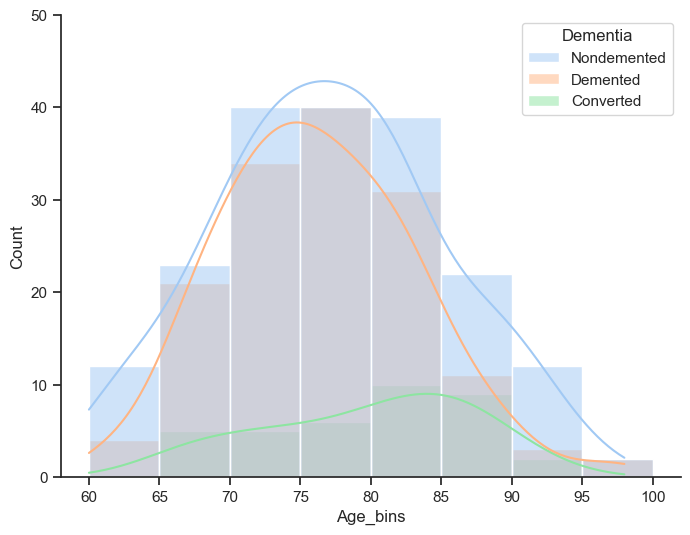

In [176]:
plt.figure ( figsize= (8,6) )
sns.histplot( data=df, x="Age", binwidth=5, kde=True, hue="Dementia" )
plt.xlabel ('Age_bins' )
plt.ylim(0,50)
plt.show()


he age distribution of converted subjects has a higher average than that of non-demented and demented subjects.

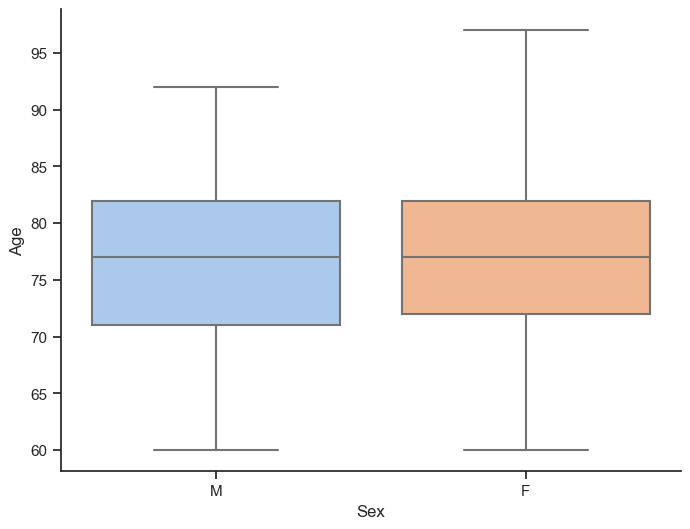

In [177]:
plt.figure ( figsize= (8,6) )
sns.boxplot( data=df,y="Age", x='Sex', showfliers = False )
plt.show ()

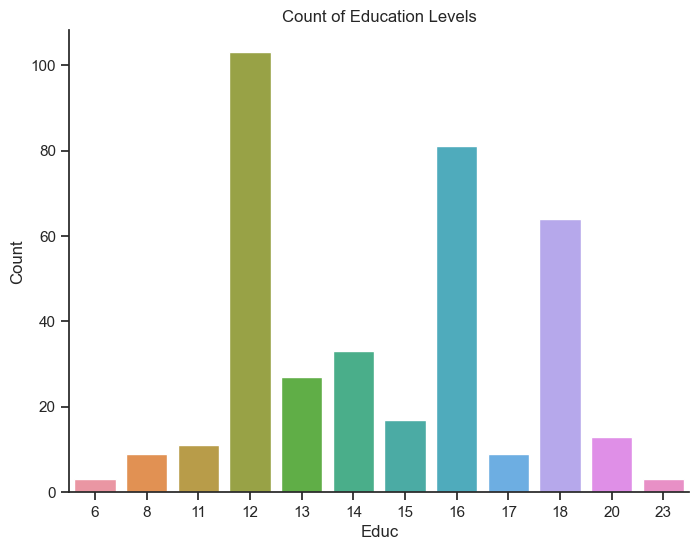

In [178]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Educ', data=df)  
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.show()


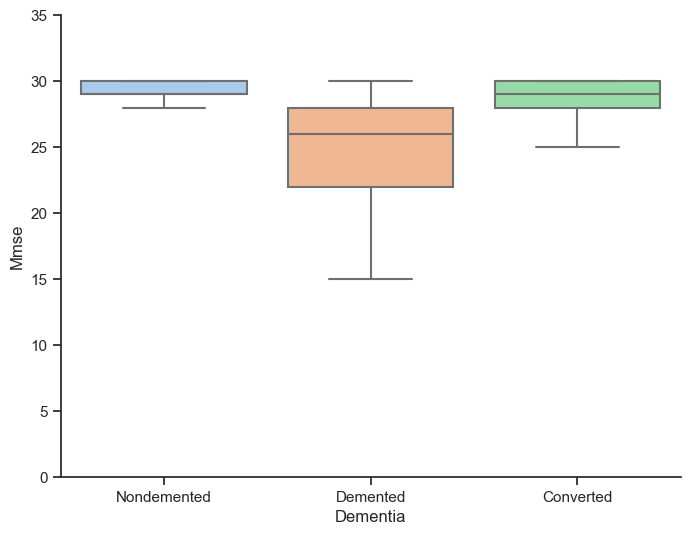

In [179]:
plt.figure ( figsize= (8,6) )
sns.boxplot(x="Dementia", y="Mmse", data=df, showfliers = False  ) # without outliers
plt.ylim(0,35)
plt.show ()

From the boxplot it is clear that:

subjects without dementia have Mmse values ​​of 30 or nearly 30.

subjects classified as 'Converted' take values ​​that tend to be slightly lower than 30.

subjects suffering from dementia have generally lower Mmse values, on average equal to 26.

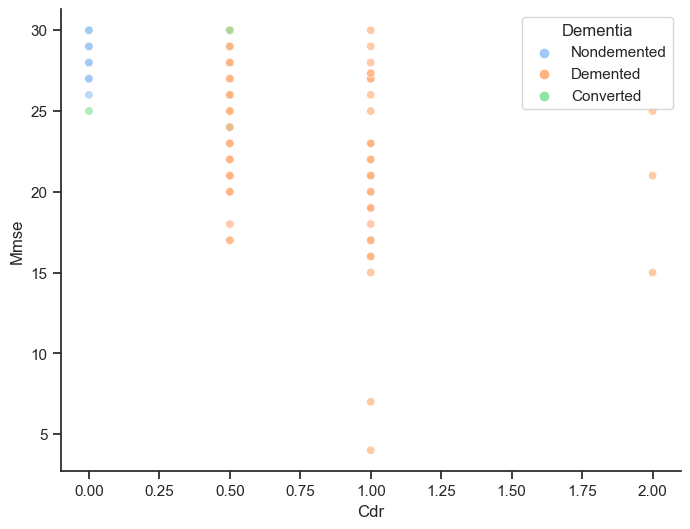

In [180]:
plt.figure ( figsize= (8,6) )
sns.scatterplot(data=df, x="Cdr", y="Mmse", hue="Dementia", alpha=0.7)
plt.show()

Looking at the scatter plot, it can be seen that for values  
<
25
  ​​of Mmse, the subjects are almost all affected by dementia.


In addition, those without dementia all have a Cdr value of 0.

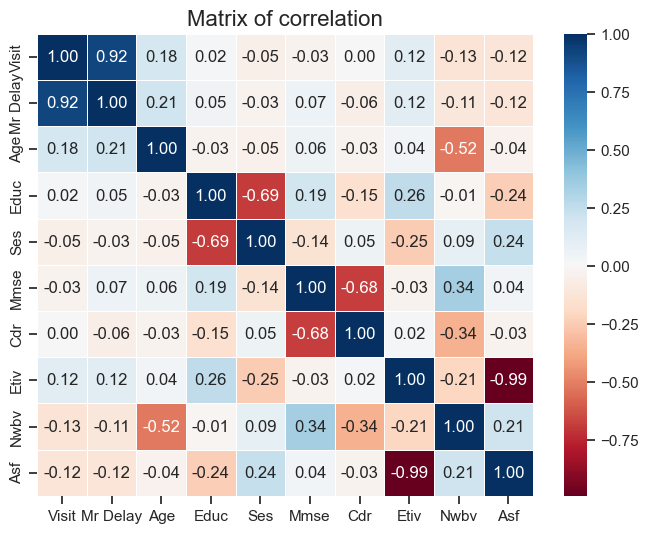

In [181]:
corr = df.corr ()
plt.figure ( figsize= (8,6) )
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
plt.title ( 'Matrix of correlation', size = 16)
plt.show ()

Mr Delay and Visit have a strong positive correlation. You can think of eliminating one of the two variables to reduce noise in the data if you are using a parametric model.

Asf and Etivhave a strong negative correlation.

## 3. PRE-PROCESSING
Management of categorical data

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()
df.Sex = le.fit_transform ( df.Sex.values )
print ( 'Sex:\n0 : %s \n1 : %s\n\n' %(le.classes_[0], le.classes_[1]) )
df.Dementia = le.fit_transform ( df.Dementia.values )
print ( 'Dementia:\n0 : %s \n1 : %s \n2 : %s' %(le.classes_[0], le.classes_[1], le.classes_[2]) )

df.Dementia = df.Dementia.astype('category')
df.Sex = df.Sex.astype('category')

Sex:
0 : F 
1 : M


Dementia:
0 : Converted 
1 : Demented 
2 : Nondemented


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dementia  373 non-null    category
 1   Visit     373 non-null    int64   
 2   Mr Delay  373 non-null    int64   
 3   Sex       373 non-null    category
 4   Age       373 non-null    int64   
 5   Educ      373 non-null    int64   
 6   Ses       373 non-null    float64 
 7   Mmse      373 non-null    float64 
 8   Cdr       373 non-null    float64 
 9   Etiv      373 non-null    int64   
 10  Nwbv      373 non-null    float64 
 11  Asf       373 non-null    float64 
dtypes: category(2), float64(5), int64(5)
memory usage: 30.2 KB


In [184]:
df.columns

Index(['Dementia', 'Visit', 'Mr Delay', 'Sex', 'Age', 'Educ', 'Ses', 'Mmse',
       'Cdr', 'Etiv', 'Nwbv', 'Asf'],
      dtype='object')

In [185]:
from sklearn.model_selection import train_test_split

X, y = df.drop ('Dementia', axis=1).values , df.Dementia.values

X_train, X_test, y_train, y_test = train_test_split ( X, y,
                                                     test_size = 0.2,
                                                     random_state = 1,
                                                     stratify = y)

Re-sampling train set


Balance the distribution of classes in the target variable with an oversampling of minority classes.

In [186]:
from imblearn.over_sampling import SMOTE

smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )


Number of observations in the target variable after oversampling of the minority class: [152 152 152]


## Standardization of features

In [187]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

In [188]:
# Print the shape of the NumPy array
print("Shape of X_train_std:", X_train_std.shape)


Shape of X_train_std: (456, 11)


In [189]:
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# Define classifiers to test
classifiers = [
    
    SVC(probability=True, random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
   
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    
   
]

model_names = [    
  'SVM',   
    'Random Forest', 'Gradient Boosting', 'Extra Trees',  
     'XGBoost'
]

# Evaluate each classifier
for clf, name in zip(classifiers, model_names):
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    train_accuracy = clf.score(X_train_std, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    cross_val = cross_val_score(clf, X_train_std, y_train, cv=5).mean()
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy: {test_accuracy:.4f}")
    print(f"  Cross-Validation Score: {cross_val:.4f}\n") 


Decision Tree:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.8267
  Cross-Validation Score: 0.8927

SVM:
  Training Accuracy: 0.9298
  Testing Accuracy: 0.8667
  Cross-Validation Score: 0.8948

KNN:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9067
  Cross-Validation Score: 0.9454

Random Forest:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9333
  Cross-Validation Score: 0.9125

Gradient Boosting:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9067
  Cross-Validation Score: 0.9671

Extra Trees:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.8000
  Cross-Validation Score: 0.8904

AdaBoost:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9333
  Cross-Validation Score: 0.9388

XGBoost:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.8800
  Cross-Validation Score: 0.9475



.

In [190]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']  # Use 'linear' or 'rbf' kernels
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5]
    },
    'Extra Trees': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Perform GridSearchCV for each classifier
best_estimators = {}

for name, clf in classifiers.items():
    print(f"Hyperparameter tuning for {name}...")
    grid_search = GridSearchCV(estimator=clf,
                               param_grid=param_grids[name],
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1,
                               verbose=1)
    grid_search.fit(X_train_std, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}\n")

Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.9497

Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting: 0.9367

Hyperparameter tuning for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9255

Hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
Best cross-validation score 

In [191]:
from sklearn.metrics import accuracy_score

# Evaluate and print accuracy for all best estimators
for name, best_estimator in best_estimators.items():
    y_pred_train = best_estimator.predict(X_train_std)
    y_pred_test = best_estimator.predict(X_test_std)
    
    print(f"{name}:")
    print(f"  Accuracy Train Score: {best_estimator.score(X_train_std, y_train):.4f}")
    print(f"  Accuracy Test Score: {accuracy_score(y_test, y_pred_test):.4f}\n")



Random Forest:
  Accuracy Train Score: 1.0000
  Accuracy Test Score: 0.9067

Gradient Boosting:
  Accuracy Train Score: 1.0000
  Accuracy Test Score: 0.9200

SVM:
  Accuracy Train Score: 0.9868
  Accuracy Test Score: 0.8933

XGBoost:
  Accuracy Train Score: 1.0000
  Accuracy Test Score: 0.9200

Extra Trees:
  Accuracy Train Score: 0.9978
  Accuracy Test Score: 0.9467



In [192]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate and print classification report and ROC-AUC score for all best estimators
for name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test_std)
    
    # Classification report
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    y_pred_proba = best_estimator.predict_proba(X_test_std)
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"{name} ROC-AUC Score: {roc_auc:.4f}\n")


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.94      1.00      0.97        29
           2       0.92      0.95      0.94        38

    accuracy                           0.91        75
   macro avg       0.82      0.77      0.79        75
weighted avg       0.89      0.91      0.90        75

Random Forest ROC-AUC Score: 0.9360

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.94      1.00      0.97        29
           2       0.93      0.97      0.95        38

    accuracy                           0.92        75
   macro avg       0.87      0.78      0.81        75
weighted avg       0.91      0.92      0.91        75

Gradient Boosting ROC-AUC Score: 0.9706

SVM Classification Report:
               precision    recall  f1-score   suppor

In [193]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Evaluate and print precision, recall, accuracy, F1 score, and AUC for all classifiers
for name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test_std)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate AUC if the model supports probability estimates
    if hasattr(best_estimator, "predict_proba"):
        auc_score = roc_auc_score(y_test, best_estimator.predict_proba(X_test_std), multi_class='ovr', average='weighted')
        print(f"{name}:\n  Precision: {precision:.4f}\n  Recall: {recall:.4f}\n  Accuracy: {accuracy:.4f}\n  F1 Score: {f1:.4f}\n  AUC: {auc_score:.4f}\n")
    else:
        print(f"{name}:\n  Precision: {precision:.4f}\n  Recall: {recall:.4f}\n  Accuracy: {accuracy:.4f}\n  F1 Score: {f1:.4f}\n")



Random Forest:
  Precision: 0.8934
  Recall: 0.9067
  Accuracy: 0.9067
  F1 Score: 0.8968
  AUC: 0.9673

Gradient Boosting:
  Precision: 0.9104
  Recall: 0.9200
  Accuracy: 0.9200
  F1 Score: 0.9078
  AUC: 0.9829

SVM:
  Precision: 0.8927
  Recall: 0.8933
  Accuracy: 0.8933
  F1 Score: 0.8928
  AUC: 0.9509

XGBoost:
  Precision: 0.9104
  Recall: 0.9200
  Accuracy: 0.9200
  F1 Score: 0.9078
  AUC: 0.9788

Extra Trees:
  Precision: 0.9500
  Recall: 0.9467
  Accuracy: 0.9467
  F1 Score: 0.9387
  AUC: 0.9710



In [194]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Cross-validation for Extra Trees
cv_scores = cross_val_score(extra_trees_model, X_train_std, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Define the parameter grid for Extra Trees
param_grid_extra_trees = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Extra Trees
grid_search_extra_trees = GridSearchCV(estimator=extra_trees_model,
                                        param_grid=param_grid_extra_trees,
                                        scoring='accuracy',
                                        cv=5,
                                        n_jobs=-1,
                                        verbose=1)

# Fit GridSearchCV
grid_search_extra_trees.fit(X_train_std, y_train)

# Output the best parameters and best cross-validation score
print(f"Best parameters for Extra Trees: {grid_search_extra_trees.best_params_}")
print(f"Best cross-validation score for Extra Trees: {grid_search_extra_trees.best_score_:.4f}")


Cross-Validation Scores: [0.95652174 0.97802198 0.94505495 0.96703297 0.98901099]
Mean CV Score: 0.9671285236502628
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Extra Trees: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Extra Trees: 0.9759


In [195]:
grid_search_extra_trees.fit ( X_train_std, y_train )
y_pred =grid_search_extra_trees.predict ( X_test_std )
print ( f'Accuracy train score: %.4f' %grid_search_extra_trees.score (X_train_std, y_train) )
print ( f'Accuracy test score: %.4f' %accuracy_score ( y_test, y_pred ) )

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy train score: 0.9978
Accuracy test score: 0.9467
